#### Auto Encoder fundemental

A small project where I build an Auto Encoder, that has the purpose to scale down and recreate numbers from the mnist dataset.

In [171]:
import numpy as np
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [172]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [173]:
encoding_dim = 10

input_image = Input(shape=(np.prod(x_train.shape[1:]),))

encoded = Dense(128, activation='relu')(input_image)
encoded = BatchNormalization()(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded_final = Dense(encoding_dim, activation='relu')(encoded)

In [174]:
decoded = Dense(16, activation='relu')(encoded_final)
decoded = BatchNormalization()(decoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded_output = Dense(np.prod(x_train.shape[1:]), activation='sigmoid')(decoded)

In [175]:
autoencoder = Model(input_image, decoded_output)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [180]:
# Train model
autoencoder.fit(x_train, x_train, epochs=40, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1292 - val_loss: 0.1279
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1276 - val_loss: 0.1258
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1263 - val_loss: 0.1230
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1253 - val_loss: 0.1226
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1240 - val_loss: 0.1217
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1235 - val_loss: 0.1212
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1225 - val_loss: 0.1210
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1217 - val_loss: 0.1186
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1202 - val_loss: 0.1189
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1192 - val_loss: 0.1173
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1182 - val_loss: 0.1165
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [181]:
reconstructed_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


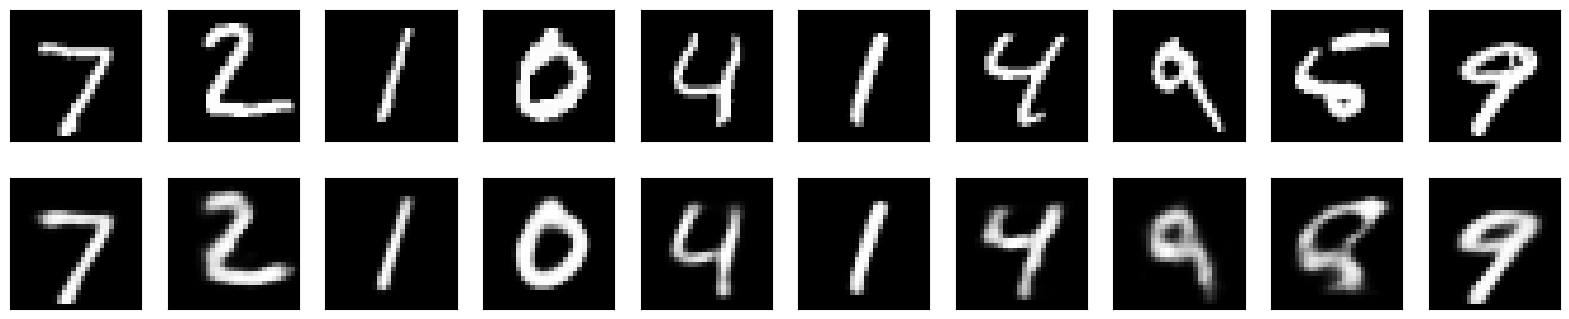

In [182]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()